In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import numpy as np

In [165]:
def plotClustersPerRun(df1,df2,label1,label2,ds,tickDensity=50):
    groupedCounts1 = df1.groupby('Run')['ChainNumber'].nunique()
    groupedCounts2 = df2.groupby('Run')['ChainNumber'].nunique()
    plt.figure(figsize=(10, 6)) 
    groupedCounts1.plot(kind='bar',color='green', label=label1, position=0.001)
    groupedCounts2.plot(kind='bar', color='red', label=label2, position=0)
    
    plt.xlabel('Run')
    plt.ylabel('')
    plt.yticks(np.arange(0, max(max(groupedCounts1), max(groupedCounts2)) + 1, tickDensity))
    #plt.xticks(rotation=85, ha='right')
    plt.title(f'Clusters {ds}')
    plt.legend()
    plt.grid(True)
    plt.show()

### Reading in cluster data file

### Cuts: isSignal, NHIW, RBI, GFA

In [15]:
mainDir = '/pscratch/sd/v/vsharma2/TriNucleonDecay/Data/ClusterOutput'

In [181]:
df3824 = pd.read_csv(mainDir+'/cluster_out/ds3824/ds3824_100.0msClustering350.0keVThreshold_test_Clustered.csv', engine='python')
df3824 = df3824.drop(['Outside?', 'X', 'Y', 'Z', 'MC Channel'], axis=1)
df3807 = pd.read_csv(mainDir+'/cluster_out/ds3807/ds3807_100.0msClustering350.0keVThreshold_test_Clustered.csv', engine='python')
df3807 = df3807.drop(['Outside?', 'X', 'Y', 'Z', 'MC Channel'], axis=1)
df3815 = pd.read_csv(mainDir+'/cluster_out/ds3815/ds3815_100.0msClustering350.0keVThreshold_test_Clustered.csv', engine='python')
df3815 = df3815.drop(['Outside?', 'X', 'Y', 'Z', 'MC Channel'], axis=1)
df3810 = pd.read_csv(mainDir+'/cluster_out/ds3810/ds3810_100.0msClustering350.0keVThreshold_test_Clustered.csv', engine='python')
df3810 = df3810.drop(['Outside?', 'X', 'Y', 'Z', 'MC Channel'], axis=1)

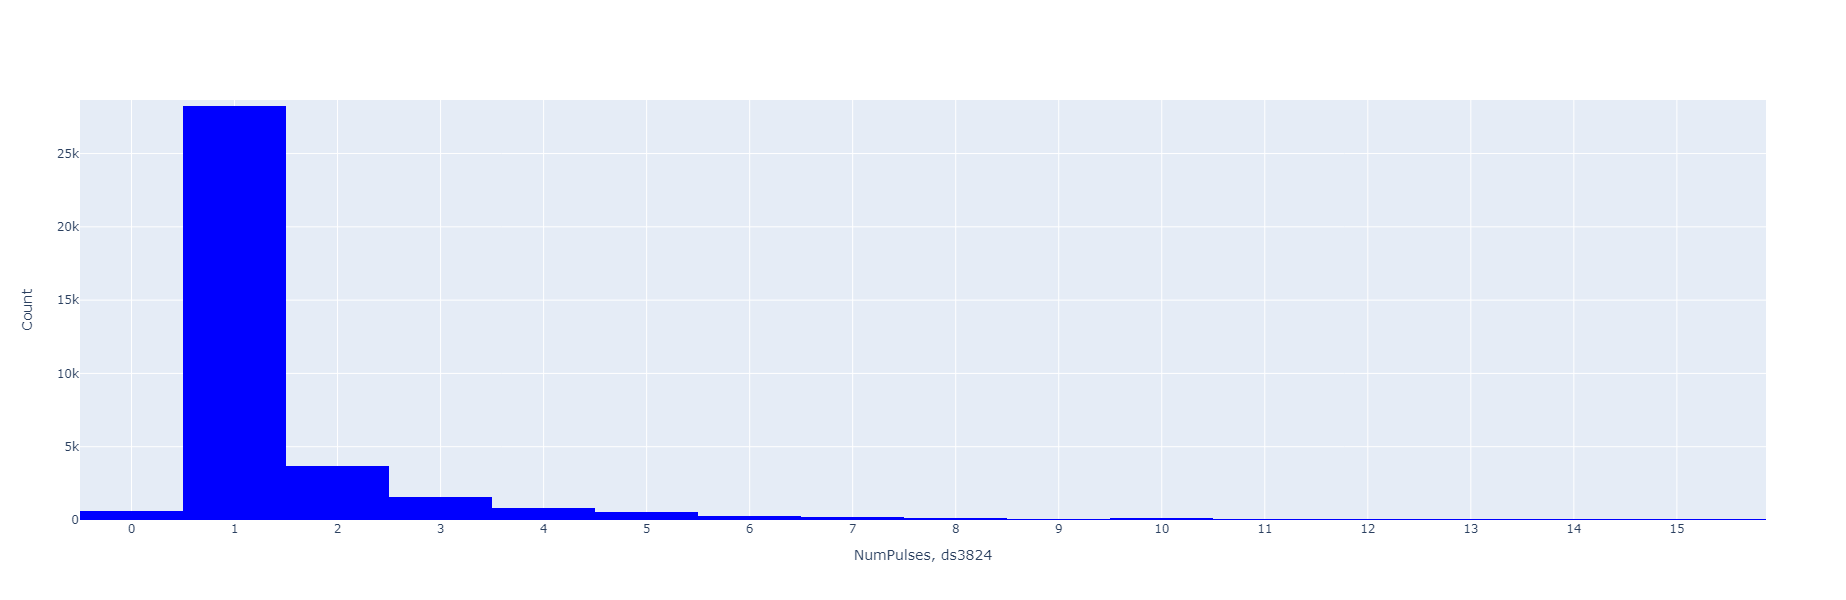

In [178]:
histogram = go.Histogram(x=df3824['NumPulses'], marker=dict(color='blue'), nbinsx=100)

# Create layout
layout = go.Layout(
    title='',
    xaxis=dict(title='NumPulses, ds3824', showgrid=True, dtick=1),
    yaxis=dict(title='Count'),
    height=600,
    width=800
)

# Create figure
fig = go.Figure(data=[histogram], layout=layout)

# Show the figure
fig.show()

In [17]:
df3807.head()

,Channel,Time,CoincTime,Baseline,MaxToBaseline,Run,EventNumber,BaselineSlope,BaselineRMS,Energy,...,OFdelay,OFChi2,OFRiseTime,OFDecayTime,Tower,Floor,BoxFilter,ChainNumber,Multiplicity,Flag
0,898,685.040,9.999999e+06,-2737.694311,12376.286077,350645,15030,0.000091,1.893601,18296.143104,...,3.183562,2.210109e+07,32.776656,1027.381718,18,1,14,35064582,21.0,False
1,775,685.048,9.999999e+06,-4860.746801,14363.634527,350645,15031,-0.000363,1.886308,32028.865437,...,3.121655,3.124504e+06,51.964148,369.860095,15,8,18,35064582,21.0,False
2,694,685.064,9.999999e+06,-3104.074570,12591.821762,350645,15033,-0.000048,1.360751,40114.366438,...,3.205069,2.784672e+07,37.247161,1081.175059,14,5,21,35064582,21.0,False
3,720,685.064,6.819685e+02,-3997.283798,1160.076004,350645,15034,-0.000138,1.809742,1959.423342,...,3.130707,3.307126e+02,126.056670,274.004717,14,5,21,35064582,21.0,False
4,682,685.064,9.999999e+06,-5091.959213,14563.204025,350645,15032,0.000233,1.456076,42840.135865,...,3.156031,2.942227e+06,70.234127,638.106503,14,6,21,35064582,21.0,False


In [18]:
df3824.head()

,Channel,Time,CoincTime,Baseline,MaxToBaseline,Run,EventNumber,BaselineSlope,BaselineRMS,Energy,...,OFdelay,OFChi2,OFRiseTime,OFDecayTime,Tower,Floor,BoxFilter,ChainNumber,Multiplicity,Flag
0,532,4142.416,4139.345801,-4277.414536,824.251389,352096,122916,-0.000395,6.476528,2182.737198,...,3.092759,1.396657,93.156292,396.533873,11,12,5,352096372,5.0,False
1,515,4142.432,4139.347688,-1828.376338,210.982844,352096,122921,0.002217,2.014472,467.100525,...,3.106944,1.049875,108.760642,442.423674,10,8,5,352096372,5.0,False
2,533,4142.432,4139.340876,-1924.740555,200.161697,352096,122922,0.000060,10.198548,388.888213,...,3.110237,4.797434,138.232057,483.433173,11,13,5,352096372,5.0,False
3,493,4142.432,4139.347945,-3519.612803,236.920848,352096,122920,0.020301,13.246498,630.068757,...,3.121656,2.648387,116.983643,409.208875,10,12,5,352096372,5.0,False
4,494,4142.448,4139.347133,199.457596,1387.174179,352096,122927,0.015312,10.075990,2646.567940,...,3.159485,10.713813,140.343435,702.005564,10,13,5,352096372,5.0,False


In [19]:
df3815.head()

,Channel,Time,CoincTime,Baseline,MaxToBaseline,Run,EventNumber,BaselineSlope,BaselineRMS,Energy,...,OFdelay,OFChi2,OFRiseTime,OFDecayTime,Tower,Floor,BoxFilter,ChainNumber,Multiplicity,Flag
0,543,2295.848,2.292752e+03,-6401.471659,184.560343,353449,45362,0.000002,5.069003,360.390664,...,3.128240,1.516468e+01,123.016678,281.251581,11,10,9,353449251,9.0,False
1,551,2295.848,9.999999e+06,-6519.397349,15893.630595,353449,45363,-0.000480,3.433149,28826.513473,...,3.198133,4.430138e+07,31.774228,761.659622,11,5,9,353449251,9.0,False
2,555,2295.856,2.292771e+03,-6777.942866,318.142146,353449,45365,0.000558,4.517678,424.375951,...,3.117959,4.314923e+00,125.888596,285.596123,11,9,9,353449251,9.0,False
3,554,2295.856,2.292763e+03,-6517.903910,1997.132884,353449,45364,0.002585,11.780179,2046.160065,...,3.134563,2.361733e+01,126.741370,411.063288,11,8,9,353449251,9.0,False
4,542,2295.864,9.999999e+06,-6861.912175,11772.812291,353449,45369,0.000687,2.403891,14337.793527,...,3.145381,2.351309e+05,118.694015,448.913129,11,9,9,353449251,9.0,False


### Cutting for NumPulses==1

In [182]:
df3824 = df3824.query('NumPulses==1', engine='python')
df3807 = df3807.query('NumPulses==1', engine='python')
df3815 = df3815.query('NumPulses==1', engine='python')
df3810 = df3810.query('NumPulses==1', engine='python')

### What is the total number of clusters in dataset?

In [183]:
print(df3824['ChainNumber'].nunique())
print(df3807['ChainNumber'].nunique())
print(df3815['ChainNumber'].nunique())
print(df3810['ChainNumber'].nunique())

2115
2181
1989
3129


### What are the total number of runs in dataset?

In [185]:
numRuns3824 = df3824['Run'].nunique()
numRuns3807 = df3807['Run'].nunique()
numRuns3815 = df3815['Run'].nunique()
numRuns3810 = df3810['Run'].nunique()

print(df3824['Run'].nunique())
print(df3807['Run'].nunique())
print(df3815['Run'].nunique())
print(df3810['Run'].nunique())

38
39
49
47


### Cutting for multiplicity > 10

In [186]:
valueCounts3824 = df3824['ChainNumber'].value_counts()
df3824M = df3824[df3824['ChainNumber'].isin(valueCounts3824.index[valueCounts3824 >= 10])]
valueCounts3807 = df3807['ChainNumber'].value_counts()
df3807M = df3807[df3807['ChainNumber'].isin(valueCounts3807.index[valueCounts3807 >= 10])]
valueCounts3815 = df3815['ChainNumber'].value_counts()
df3815M = df3815[df3815['ChainNumber'].isin(valueCounts3815.index[valueCounts3815 >= 10])]
valueCounts3810 = df3810['ChainNumber'].value_counts()
df3810M = df3810[df3810['ChainNumber'].isin(valueCounts3810.index[valueCounts3810 >= 10])]

### Distribution of clusters w.r.t. to runs

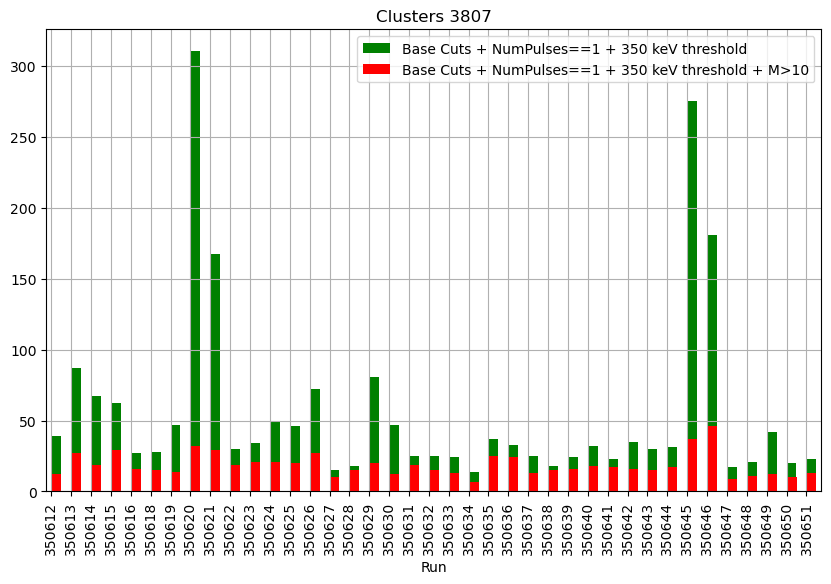

In [55]:
plotClustersPerRun(df3807,df3807M,'Base Cuts + NumPulses==1 + 350 keV threshold','Base Cuts + NumPulses==1 + 350 keV threshold + M>10',3807)

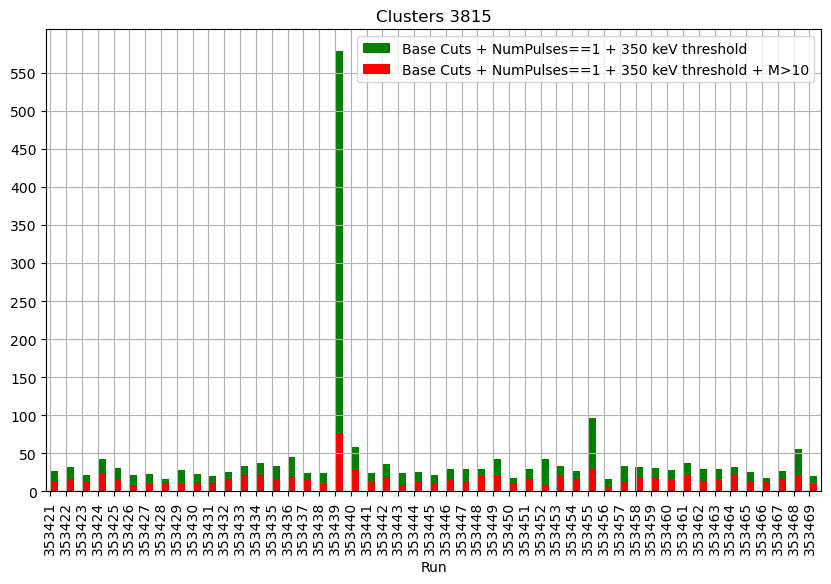

In [179]:
plotClustersPerRun(df3815,df3815M,'Base Cuts + NumPulses==1 + 350 keV threshold','Base Cuts + NumPulses==1 + 350 keV threshold + M>10',3815)

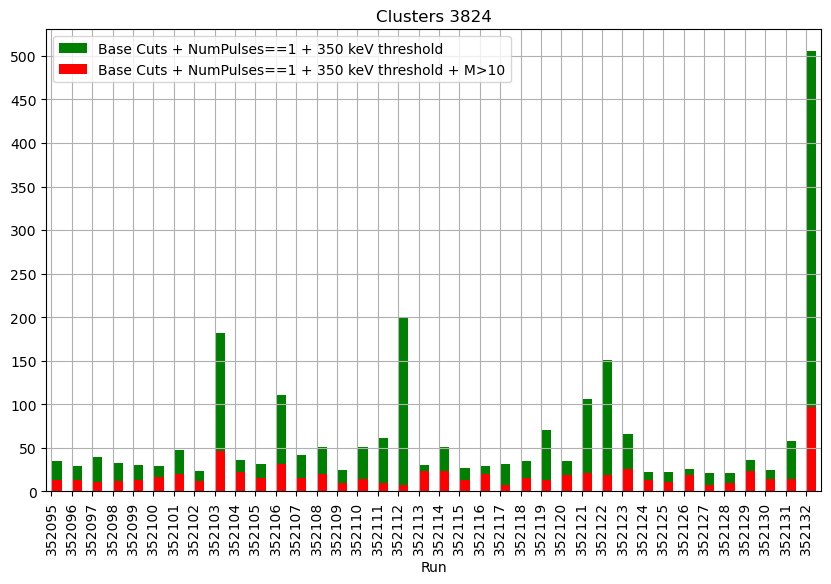

In [180]:
plotClustersPerRun(df3824,df3824M,'Base Cuts + NumPulses==1 + 350 keV threshold','Base Cuts + NumPulses==1 + 350 keV threshold + M>10',3824)

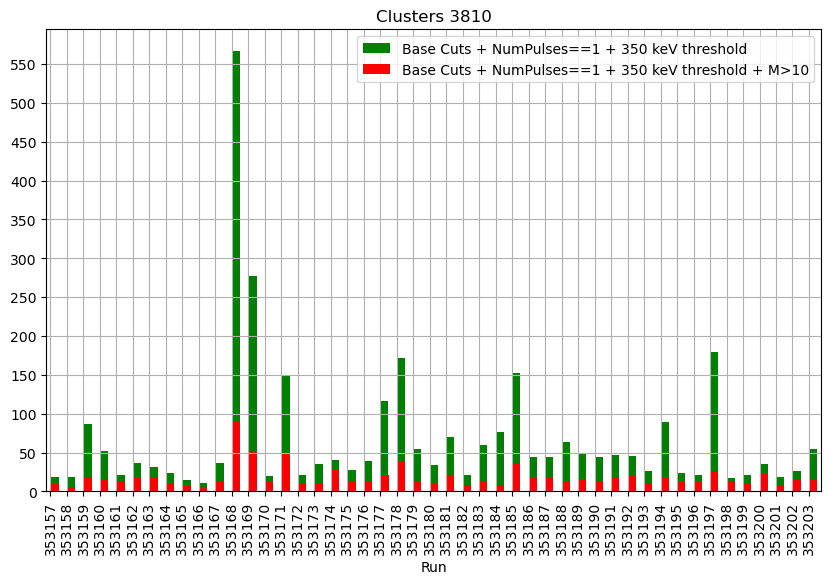

In [187]:
plotClustersPerRun(df3810,df3810M,'Base Cuts + NumPulses==1 + 350 keV threshold','Base Cuts + NumPulses==1 + 350 keV threshold + M>10',3810)

In [65]:
df3824.query('Run==352132', engine='python')['ChainNumber'].nunique()

469

### Number of clusters after multiplicity cut

In [190]:
print('3824 -- '+str(df3824M['ChainNumber'].nunique()))
print('3807 -- '+str(df3807M['ChainNumber'].nunique()))
print('3815 -- '+str(df3815M['ChainNumber'].nunique()))
print('3810 -- '+str(df3810M['ChainNumber'].nunique()))

3824 -- 713
3807 -- 726
3815 -- 815
3810 -- 862


### Number of clusters per run for each dataset

In [192]:
print('3824 -- '+str(df3824M['ChainNumber'].nunique()/numRuns3824))
print('3807 -- '+str(df3807M['ChainNumber'].nunique()/numRuns3807))
print('3815 -- '+str(df3815M['ChainNumber'].nunique()/numRuns3815))
print('3810 -- '+str(df3810M['ChainNumber'].nunique()/numRuns3810))

3824 -- 18.763157894736842
3807 -- 18.615384615384617
3815 -- 16.632653061224488
3810 -- 18.340425531914892


### Multiplicity Distribution

### Need to update multiplicity distribution after adding other datasets

In [66]:
valueCountsM = df3824M['ChainNumber'].value_counts().reset_index()

In [67]:
valueCountsM['ChainNumber']

0      612
1      455
2      404
3      394
4      367
      ... 
708     10
709     10
710     10
711     10
712     10
Name: ChainNumber, Length: 713, dtype: int64

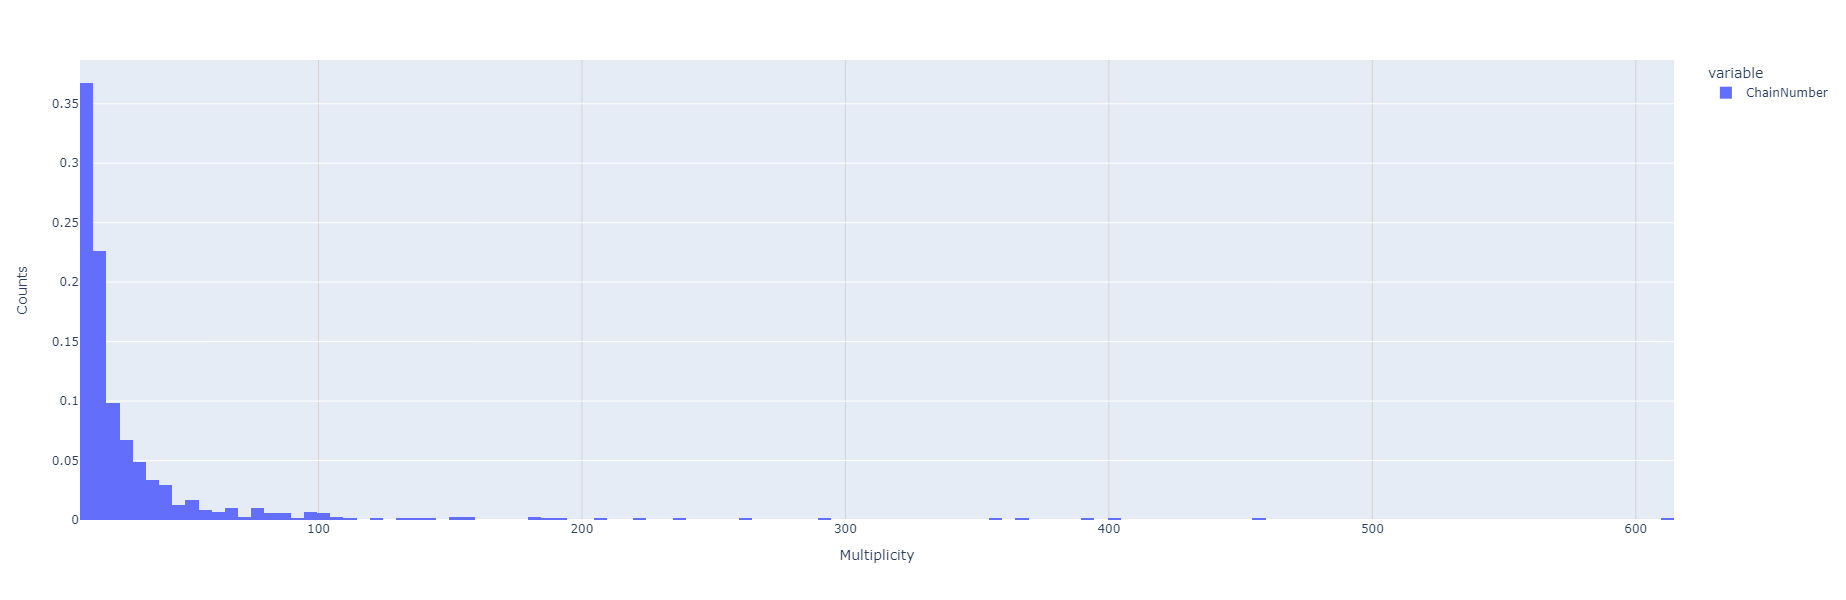

In [69]:
fig = px.histogram(valueCountsM['ChainNumber'], nbins=200, histnorm='probability')
fig.update_layout(title=' ', xaxis_title='Multiplicity', yaxis_title='Counts', height=600, width=800, 
                 xaxis=dict(showgrid=True, gridwidth=1, gridcolor='LightGray'))
fig.show()

In [81]:
event_353439 = df3815.query('Run==353439', engine='python')['EventNumber']
event_353439.to_csv('353439.txt', header=False, index=False)
len(event_353439)

In [82]:
event_353438 = df3815.query('Run==353438', engine='python')['EventNumber']
event_353438.to_csv('353438.txt', header=False, index=False)
len(event_353438)

372

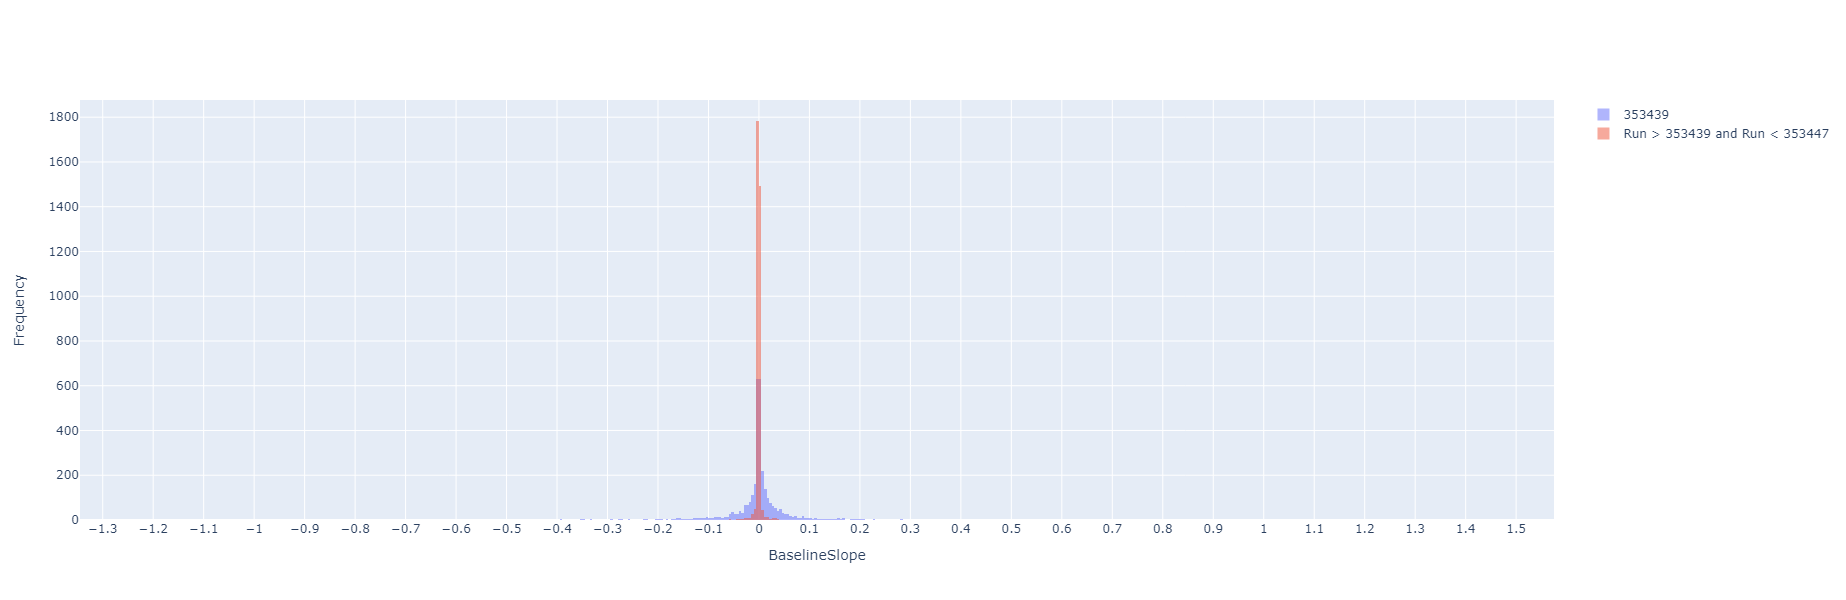

3346
3515


In [197]:
trace1 = go.Histogram(x=df3815.query('Run==353439', engine='python')['BaselineSlope'], name='353439', nbinsx=600, opacity=0.5)
trace2 = go.Histogram(x=df3815.query('Run > 353439 and Run < 353447', engine='python')['BaselineSlope'], name='Run > 353439 and Run < 353447', nbinsx=600, opacity=0.5)

# Create layout
layout = go.Layout(title='',
                   xaxis=dict(title='BaselineSlope', showgrid=True, dtick=0.1),
                   yaxis=dict(title='Frequency'),
                              barmode='overlay',
                              width=1000,
                              height=600)

# Add traces to a figure
fig = go.Figure(data=[trace1, trace2], layout=layout)

# Display the plot
fig.show()
print(len(df3815.query('Run==353439', engine='python')['BaselineSlope']))
print(len(df3815.query('Run > 353439 and Run < 353447', engine='python')['BaselineSlope']))

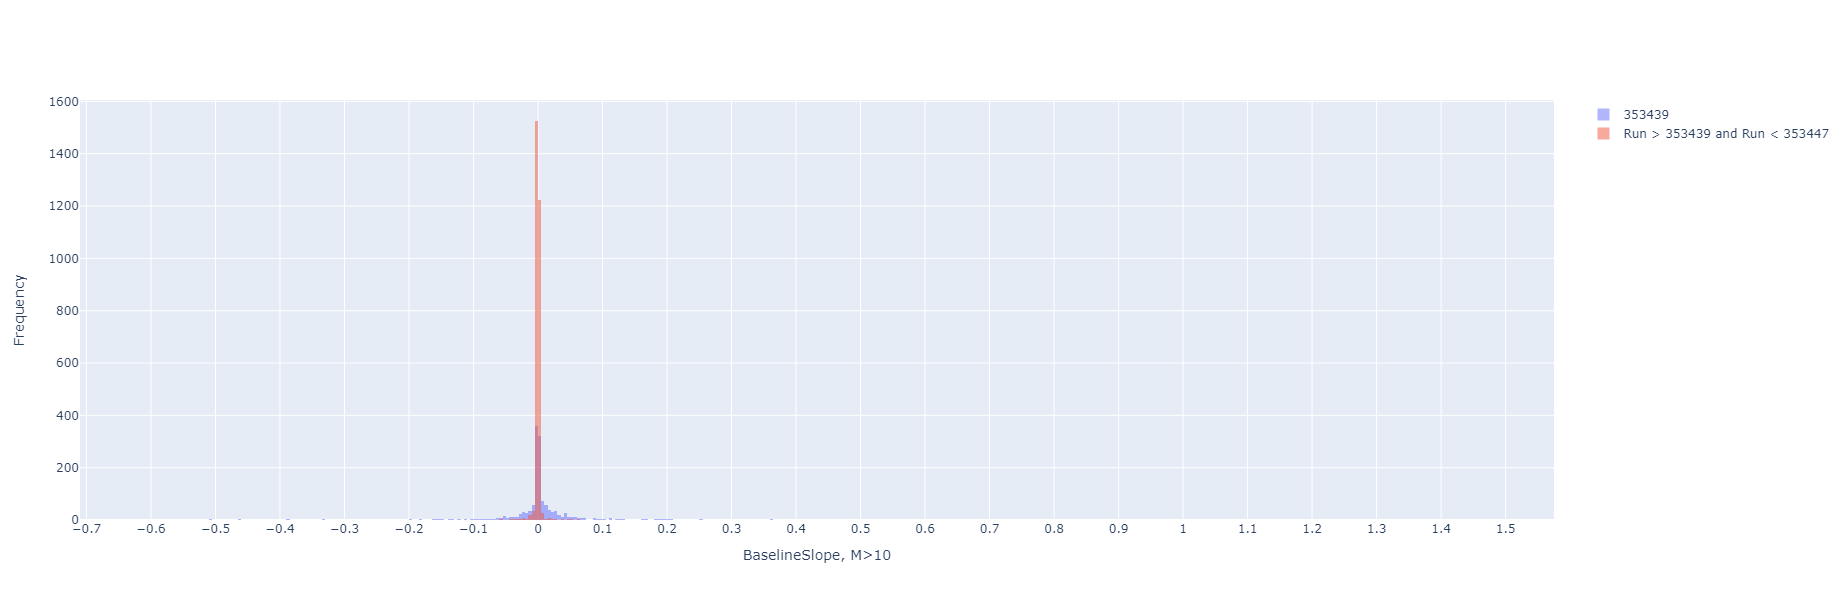

1440
2900


In [196]:
trace1 = go.Histogram(x=df3815M.query('Run==353439', engine='python')['BaselineSlope'], name='353439', nbinsx=600, opacity=0.5)
trace2 = go.Histogram(x=df3815M.query('Run > 353439 and Run < 353447', engine='python')['BaselineSlope'], name='Run > 353439 and Run < 353447', nbinsx=600, opacity=0.5)

# Create layout
layout = go.Layout(title='',
                   xaxis=dict(title='BaselineSlope, M>10', showgrid=True, dtick=0.1),
                   yaxis=dict(title='Frequency'),
                              barmode='overlay',
                              width=1000,
                              height=800)

# Add traces to a figure
fig = go.Figure(data=[trace1, trace2], layout=layout)

# Display the plot
fig.show()
print(len(df3815M.query('Run==353439', engine='python')['BaselineSlope']))
print(len(df3815M.query('Run > 353439 and Run < 353447', engine='python')['BaselineSlope']))

In [160]:
df3815B = df3815M.query('BaselineSlope > -0.01 and BaselineSlope < 0.01', engine='python')
df3824B = df3824M.query('BaselineSlope > -0.01 and BaselineSlope < 0.01', engine='python')
df3807B = df3807M.query('BaselineSlope > -0.01 and BaselineSlope < 0.01', engine='python')

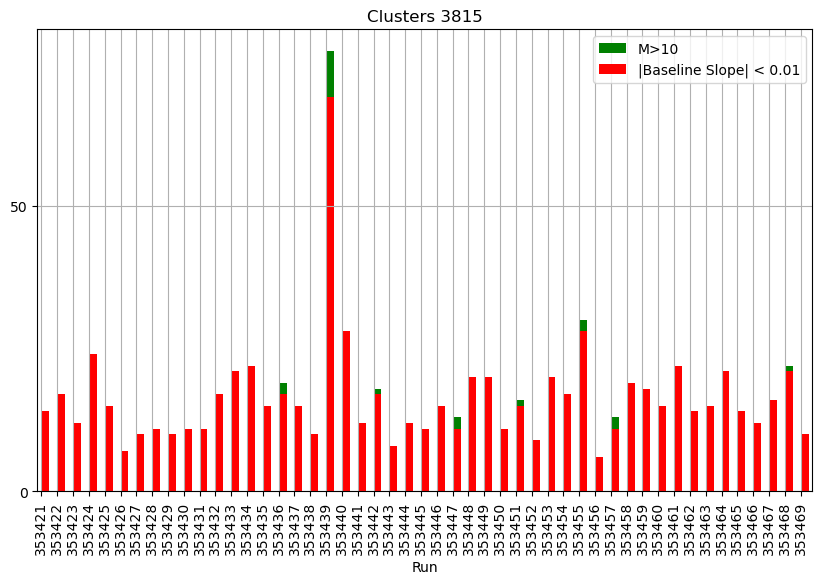

In [201]:
plotClustersPerRun(df3815M, df3815B, 'M>10','|Baseline Slope| < 0.01', 3815)

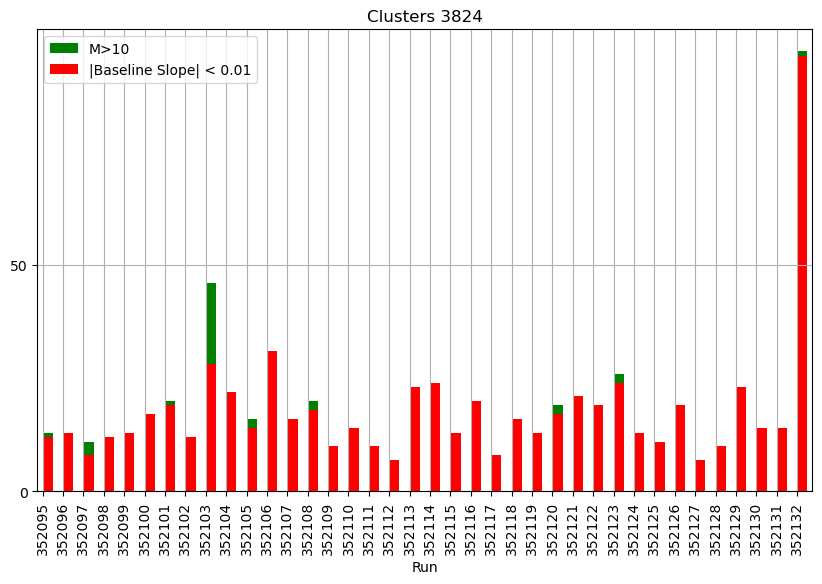

In [163]:
plotClustersPerRun(df3824M, df3824B, 'M>10','|Baseline Slope| < 0.01', 3824)

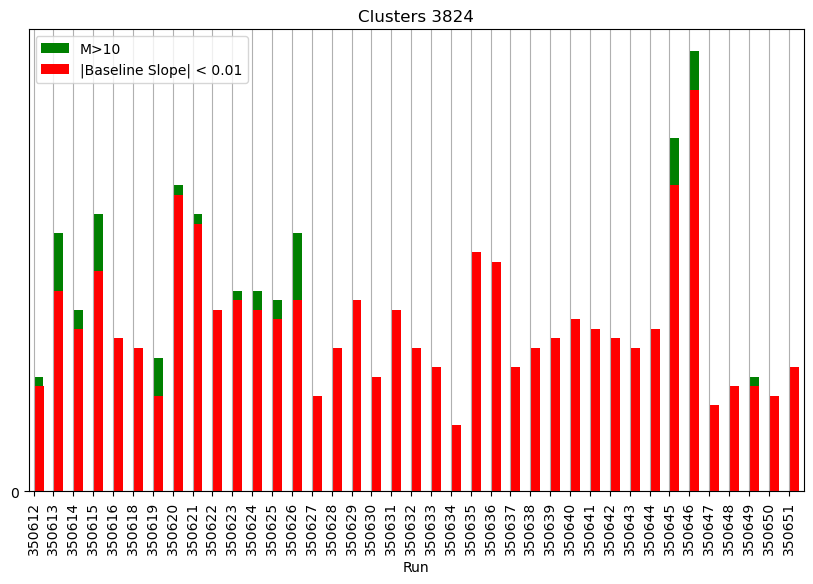

In [164]:
plotClustersPerRun(df3807M, df3807B, 'M>10','|Baseline Slope| < 0.01', 3824)

### Time distribution? Pulses? MC vs Data? Tower distribution?

In [208]:
df3815Raw = pd.read_csv(mainDir+'/cluster_out/ds3815/ds3815_100.0msClustering350.0keVThreshold_test_Clustered.csv', engine='python')
df3815Raw.query('Run==353439 and (EventNumber==353583 or EventNumber==353625 or EventNumber==353626)', engine='python')

,Channel,Time,CoincTime,Baseline,MaxToBaseline,Run,EventNumber,BaselineSlope,BaselineRMS,Energy,...,Tower,Floor,Outside?,X,Y,Z,BoxFilter,ChainNumber,Multiplicity,Flag
7603,216,17223.240,17220.296139,-6334.689143,66.828730,353439,353583,-0.012847,2.361314,352.968171,...,5,8,0,-29.7,-29.4,58,3,3534392070,5.0,False
7607,346,17223.560,17220.460620,-6688.927602,233.052205,353439,353625,0.008411,10.167396,370.652243,...,7,8,1,29.7,323.4,58,7,3534392074,7.0,False
7608,345,17223.568,17220.443726,-4838.112122,265.270477,353439,353626,0.010124,9.476402,491.607355,...,7,7,1,29.7,323.4,0,7,3534392074,7.0,False


In [215]:
df3815Raw.query('ChainNumber==3534392074', engine='python')

,Channel,Time,CoincTime,Baseline,MaxToBaseline,Run,EventNumber,BaselineSlope,BaselineRMS,Energy,...,Tower,Floor,Outside?,X,Y,Z,BoxFilter,ChainNumber,Multiplicity,Flag
7604,354,17223.520,17220.406362,-4296.593007,227.875051,353439,353615,0.006324,2.382325,353.588124,...,7,3,1,-29.7,323.4,-232,5,3534392074,7.0,False
7605,357,17223.528,17220.414461,-6912.329814,259.066722,353439,353617,0.006637,8.882854,602.837494,...,7,6,1,-29.7,323.4,-58,6,3534392074,7.0,False
7606,343,17223.560,17220.469519,-5971.695592,258.988073,353439,353623,0.007113,5.221867,1073.496730,...,7,5,1,29.7,323.4,-116,7,3534392074,7.0,False
7607,346,17223.560,17220.460620,-6688.927602,233.052205,353439,353625,0.008411,10.167396,370.652243,...,7,8,1,29.7,323.4,58,7,3534392074,7.0,False
7608,345,17223.568,17220.443726,-4838.112122,265.270477,353439,353626,0.010124,9.476402,491.607355,...,7,7,1,29.7,323.4,0,7,3534392074,7.0,False
7609,355,17223.576,17220.468637,-4303.764013,240.012792,353439,353628,0.008099,5.521197,384.971217,...,7,4,1,-29.7,323.4,-174,6,3534392074,7.0,False
7610,356,17223.608,17220.494360,-4497.564941,276.079803,353439,353633,0.009194,9.250998,458.235221,...,7,5,1,-29.7,323.4,-116,5,3534392074,7.0,False


In [223]:
df3815Raw.query('ChainNumber==3534391754', engine='python')

,Channel,Time,CoincTime,Baseline,MaxToBaseline,Run,EventNumber,BaselineSlope,BaselineRMS,Energy,...,Tower,Floor,Outside?,X,Y,Z,BoxFilter,ChainNumber,Multiplicity,Flag
7554,975,15405.496,15402.320864,-6931.769155,423.823140,353439,315079,0.004885,28.581258,924.749124,...,19,13,1,-323.7,-176.4,348,16,3534391754,16.0,False
7555,129,15405.496,15402.404446,-6326.180003,219.978831,353439,315076,-0.001452,5.939411,636.917732,...,3,12,1,-264.3,-29.4,290,16,3534391754,16.0,False
7556,340,15405.496,15402.401116,-5485.333522,97.706874,353439,315077,-0.001094,3.571571,501.655123,...,7,2,1,29.7,323.4,-290,16,3534391754,16.0,False
7557,208,15405.504,15402.348532,-7460.275920,671.228678,353439,315083,-0.000031,2.695266,829.180784,...,4,13,1,-323.7,176.4,348,16,3534391754,16.0,False
7558,165,15405.512,15402.348660,-8412.604116,1551.298879,353439,315090,0.000200,1.947749,1462.822272,...,4,9,1,-323.7,117.6,116,16,3534391754,16.0,False
7559,156,15405.512,15402.402305,-5494.049698,1298.920303,353439,315089,0.000569,2.874054,2083.050968,...,3,13,1,-323.7,29.4,348,16,3534391754,16.0,False
7560,205,15405.512,15402.344359,-7683.401098,2026.609411,353439,315093,0.000269,1.610250,2708.405897,...,4,10,1,-323.7,176.4,174,16,3534391754,16.0,False
7561,204,15405.512,15402.344316,-7263.132858,804.133224,353439,315092,0.000048,1.650741,888.803632,...,4,9,1,-323.7,176.4,116,16,3534391754,16.0,False
7562,972,15405.520,15402.324701,-7004.338221,298.684077,353439,315101,-0.000025,2.378122,440.796237,...,19,10,1,-323.7,-176.4,174,16,3534391754,16.0,False
7563,193,15405.520,15402.351564,-6782.678070,444.161835,353439,315095,-0.000187,2.427892,717.417905,...,4,11,1,-264.3,176.4,232,16,3534391754,16.0,False


In [216]:
chain1 = df3815Raw.query('ChainNumber==3534392074', engine='python')['EventNumber']

In [217]:
chain2 = df3815Raw.query('ChainNumber==3534391754', engine='python')['EventNumber']

In [218]:
chain1.to_csv('353439Chain1.txt', header=False, index=False)
chain2.to_csv('353439Chain2.txt', header=False, index=False)

In [207]:
df3815Raw.head()

,Channel,Time,CoincTime,Baseline,MaxToBaseline,Run,EventNumber,BaselineSlope,BaselineRMS,Energy,...,Tower,Floor,Outside?,X,Y,Z,BoxFilter,ChainNumber,Multiplicity,Flag
0,543,2295.848,2.292752e+03,-6401.471659,184.560343,353449,45362,0.000002,5.069003,360.390664,...,11,10,1,323.7,117.6,174,9,353449251,9.0,False
1,551,2295.848,9.999999e+06,-6519.397349,15893.630595,353449,45363,-0.000480,3.433149,28826.513473,...,11,5,1,323.7,176.4,-116,9,353449251,9.0,False
2,555,2295.856,2.292771e+03,-6777.942866,318.142146,353449,45365,0.000558,4.517678,424.375951,...,11,9,1,323.7,176.4,116,9,353449251,9.0,False
3,554,2295.856,2.292763e+03,-6517.903910,1997.132884,353449,45364,0.002585,11.780179,2046.160065,...,11,8,1,323.7,176.4,58,9,353449251,9.0,False
4,542,2295.864,9.999999e+06,-6861.912175,11772.812291,353449,45369,0.000687,2.403891,14337.793527,...,11,9,1,323.7,117.6,116,9,353449251,9.0,False


In [219]:
df3815MTower = df3815M.groupby('ChainNumber').filter(lambda x: len(x['Tower'].unique()) > 1)

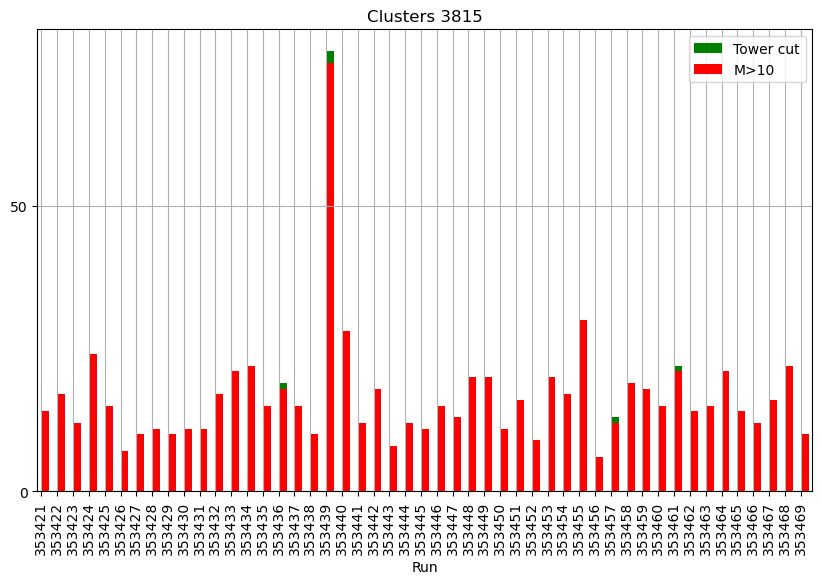

In [221]:
plotClustersPerRun(df3815M, df3815MTower, 'Tower cut','M>10', 3815)

In [227]:
df3815Raw.query("ChainNumber==3534391998", engine='python')

,Channel,Time,CoincTime,Baseline,MaxToBaseline,Run,EventNumber,BaselineSlope,BaselineRMS,Energy,...,Tower,Floor,Outside?,X,Y,Z,BoxFilter,ChainNumber,Multiplicity,Flag
7581,559,17214.448,17211.355332,-6126.823344,4017.402568,353439,353119,0.005334,8.104426,4499.949524,...,11,13,1,323.7,176.4,348,4,3534391998,12.0,False
7582,931,17214.456,17211.339800,-4626.722041,780.145350,353439,353120,0.013634,16.033376,1020.506876,...,18,8,1,-117.3,-249.9,58,5,3534391998,12.0,False
7583,520,17214.480,17211.393722,-5750.222254,174.820948,353439,353121,0.001762,3.152582,382.770737,...,10,13,1,264.3,29.4,348,7,3534391998,12.0,False
7584,558,17214.496,17211.409949,-6012.246943,2289.037562,353439,353122,-0.001413,5.379980,2222.231306,...,11,12,1,323.7,176.4,290,7,3534391998,12.0,False
7585,557,17214.504,17211.422292,-5476.208043,1998.451543,353439,353126,0.000239,2.865435,1922.604936,...,11,11,1,323.7,176.4,232,6,3534391998,12.0,False
7586,533,17214.520,17211.394924,-8298.460800,919.813950,353439,353127,-0.006696,11.608830,847.433509,...,11,13,1,264.3,117.6,348,5,3534391998,12.0,False
7587,351,17214.528,17211.415960,-5888.699870,1252.171855,353439,353129,0.002426,7.343711,2488.196261,...,7,13,1,29.7,323.4,348,6,3534391998,12.0,False
7588,928,17214.576,17211.522149,-3149.401499,363.142802,353439,353134,0.007694,9.051762,366.098684,...,18,5,1,-117.3,-249.9,-116,6,3534391998,12.0,False
7589,532,17214.592,17211.479967,-4747.328059,539.701716,353439,353135,-0.000315,6.097176,531.050362,...,11,12,1,264.3,117.6,290,5,3534391998,12.0,False
7590,556,17214.592,17211.500203,-6272.335281,834.560623,353439,353136,-0.000632,1.729083,692.024489,...,11,10,1,323.7,176.4,174,5,3534391998,12.0,False


In [229]:
chain3 = df3815Raw.query("ChainNumber==3534391998", engine='python')['EventNumber']
chain3.to_csv('353439Chain3.txt', header=False, index=False)

# Timing

In [ ]:
def plotTimeDiff(df):
    

In [14]:
import pandas as pd
from itertools import product
# Create a sample DataFrame with a column 'time' containing floats
data = {'time': [1.0, 2.5, 4.0, 5.5]}
df = pd.DataFrame(data)

# Get all possible pairs of elements, including self-pairs
pairs = list(product(df['time'], repeat=2))

# Calculate the differences between all pairs
differences = [(x - y) for x, y in pairs]

# Count the frequency of all unique values in the differences
frequency = pd.Series(differences).value_counts()

print(frequency)

 0.0    4
-1.5    3
 1.5    3
-3.0    2
 3.0    2
-4.5    1
 4.5    1
dtype: int64


In [8]:
differences

[-1.5, -3.0, -4.5, -1.5, -3.0, -1.5]

In [16]:
import pandas as pd
from itertools import permutations

# Create a sample DataFrame with a column 'time' containing floats
data = {'time': [1.0, 2.5, 4.0, 5.5], 'chain': [1,1,2,2]}
df = pd.DataFrame(data)

# Get all possible pairs of elements without self-pairs
pairs = list(permutations(df['time'], 2))

# Calculate the differences between all pairs
differences = [(x - y) for x, y in pairs]

# Count the frequency of all unique values in the differences
frequency = pd.Series(differences).value_counts()

print(frequency)

-1.5    3
 1.5    3
-3.0    2
 3.0    2
-4.5    1
 4.5    1
dtype: int64


In [17]:
dfG = df.groupby('chain')

In [29]:
import pandas as pd
from itertools import permutations

# Create a sample DataFrame with 'time' and 'chain' columns
data = {'time': [1.0, 2.5, 4.0, 5.5], 'chain': [1, 1, 1, 2]}
df = pd.DataFrame(data)

# Initialize an empty list to store differences
all_differences = []

# Group the DataFrame by the 'chain' column and calculate differences within each group
for _, group in df.groupby('chain'):
    # Get all possible pairs of elements within the group
    pairs = list(permutations(group['time'], 2))
    # Calculate the differences between all pairs within the group
    differences = [x - y for x, y in pairs]
    # Add the differences to the list
    all_differences.extend(differences)

# Count the frequency of all unique values in the differences
frequency = pd.Series(all_differences).value_counts()

print(frequency)

-1.5    2
 1.5    2
-3.0    1
 3.0    1
dtype: int64
